In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import scipy.integrate as integrate
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.setrecursionlimit(5000)
import matplotlib as mpl

import warnings
warnings.filterwarnings('ignore')

np.random.seed(54321)

## Problem 1
### (a)

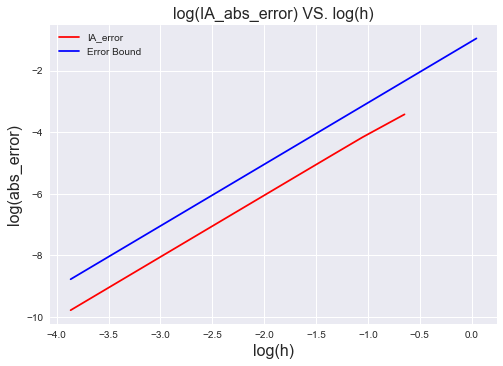

In [2]:
def f1(x): # function to integrate
    return 1/(5/4-cos(x))

def f1_deriv2(x): # 2nd derivative of f1()
    numerator = -5/4*cos(x) + sin(x)**2 + 1
    denominator = (5/4 - cos(x))**3
    return numerator/denominator

a1 = 0
b1 = pi/3
ns = np.arange(50)+1 # number of intervals

IA_list = []
IA_error_list = []
h_list1 = []

for n in ns:
    h = (b1-a1)/n # step size
    h_list1.append(h)
    
    IA = 0.5*f1(a1)+0.5*f1(b1) # compute numerical integration - Trapezoid Rule
    for i in range(1, n):
        xi = a1 + i*h
        IA += f1(xi)
    IA *= h
    IA_list.append(IA)
    IA_error_list.append(abs(pi*8/9-IA)) # absolute error


# Compute error bounds
X_lin = np.linspace(a1, b1, 100)
Y_f1_deriv2 = np.array([f1_deriv2(XX) for XX in X_lin])
M = max(Y_f1_deriv2)
Err_bounds = np.array([M*pi*h*h/36 for h in h_list1])

# Plot on loglog-scale absolute error and the error bound
plt.plot(np.log(h_list1), np.log(IA_error_list), 'r-', label='IA_error')
plt.plot(np.log(h_list1), np.log(Err_bounds), 'b-', label='Error Bound')
plt.xlabel('log(h)', fontsize=16)
plt.ylabel('log(abs_error)', fontsize=16)
plt.title('log(IA_abs_error) VS. log(h)', fontsize=16)
plt.legend()

### (b)

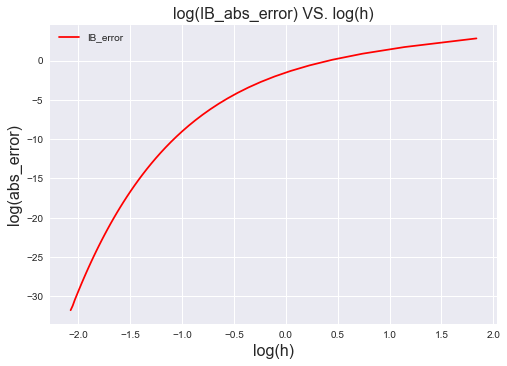

In [3]:
a2 = 0
b2 = 2*pi

IB_list = []
IB_error_list = []
h_list2 = []

for n in ns:
    h = (b2-a2)/n # step size
    h_list2.append(h)
    
    IB = 0.5*f1(a2)+0.5*f1(b2) # compute numerical integration - Trapezoid Rule
    for i in range(1, n):
        xi = a2 + i*h
        IB += f1(xi)
    IB *= h
    IB_list.append(IB)
    IB_error_list.append(abs(pi*8/3-IB)) # absolute error

# Plot on loglog-scale absolute error
plt.plot(np.log(h_list2), np.log(IB_error_list), 'r-', label='IB_error')
plt.xlabel('log(h)', fontsize=16)
plt.ylabel('log(abs_error)', fontsize=16)
plt.title('log(IB_abs_error) VS. log(h)', fontsize=16)
plt.legend()

## Problem 2
### (b)

In [4]:
T = 1e-6 # tolerance level
ws = [5/9, 8/9, 5/9]
xs = [-sqrt(3/5), 0, sqrt(3/5)] # roots of degree_3 Legendre polynomial
ms = [4, 5, 6, 7, 8] # values of m


def f_m4_transform(x, a, b): # m = 4
    z = (b-a)/2 * x + (b+a)/2
    return z**4 - z**2 + 1

def f_m5_transform(x, a, b): # m = 5
    z = (b-a)/2 * x + (b+a)/2
    return z**5 - z**2 + 1

def f_m6_transform(x, a, b): # m = 6
    z = (b-a)/2 * x + (b+a)/2
    return z**6 - z**2 + 1

def f_m7_transform(x, a, b): # m = 7
    z = (b-a)/2 * x + (b+a)/2
    return z**7 - z**2 + 1

def f_m8_transform(x, a, b): # m = 8
    z = (b-a)/2 * x + (b+a)/2
    return z**8 - z**2 + 1


def quad_3pts(f, w, x, a, b): # quadrature using the 3-point rule
    return (w[0]*f(x[0], a, b) + w[1]*f(x[1], a, b) + w[2]*f(x[2], a, b))*(b-a)/2

def adaptive_integate(f, ws, xs, a, b, n_interval, total_err):
    c = (a+b)/2 # middle point of (a, b)
    l = abs(a-b) # length of the interval (a, b)
    I = quad_3pts(f, ws, xs, a, b)
    I2 = quad_3pts(f, ws, xs, a, c) + quad_3pts(f, ws, xs, c, b)
    E = abs(I - I2) # estimate of error of I(a, b)
    if E < T*l: # just use one interval 
        n_interval += 1
        return I, n_interval, E 
    else: # split into 2 sub-intervals; recursively integrate both and sum up
        IA, n1, E1 = adaptive_integate(f, ws, xs, a, c, n_interval, total_err)
        IB, n2, E2 = adaptive_integate(f, ws, xs, c, b, n_interval, total_err)
        total_err = E1 + E2
        return  IA+IB, (n1+n2), total_err


In [5]:
f_ms = [f_m4_transform, f_m5_transform, f_m6_transform, f_m7_transform, f_m8_transform]
for m, f_m in zip(ms, f_ms):
    I, n, e = adaptive_integate(f_m, ws, xs, -1, 5/4, 0, 0)
    print('m = %d: I = %.10f, n_intervals = %d, total_error = %.20f'%(m, I, n, e))

m = 4: I = 2.0759765625, n_intervals = 1, total_error = 0.00000000000000000000
m = 5: I = 1.7347412109, n_intervals = 1, total_error = 0.00000000000000000000
m = 6: I = 2.0896776854, n_intervals = 8, total_error = 0.00000039150764707951
m = 7: I = 1.8856830810, n_intervals = 11, total_error = 0.00000059840882827775
m = 8: I = 2.2045781013, n_intervals = 13, total_error = 0.00000029345507567002


### (c)

In [6]:
def abs_transform(x, a, b): # Integral |x| over [a, b]
    z = (b-a)/2 * x + (b+a)/2
    return abs(z)

def f_3_transform(x, a, b): # Integral x**(3/4)*sin(1/x) over [a, b]
    z = (b-a)/2 * x + (b+a)/2
    return z**(3/4)*sin(1/z)


In [7]:
I_c1, n_c1, e_c1 = adaptive_integate(abs_transform, ws, xs, -1, 1, 0, 0)
I_c2, n_c2, e_c2 = adaptive_integate(abs_transform, ws, xs, -1, 2, 0, 0)
I_c3, n_c3, e_c3 = adaptive_integate(f_3_transform, ws, xs, 0, 1, 0, 0)

print('I(|x|) over [-1, 1]: \nI = %.10f, n_intervals = %d, total_error = %.20f \n'% (I_c1, n_c1, e_c1))
print('I(|x|) over [-1, 2]: \nI= %.10f, n_intervals = %d, total_error = %.20f \n'% (I_c2, n_c2, e_c2))
print('I(x**(3/4)*sin(1/x)) over [0, 1]: \nI = %.10f, n_intervals = %d, total_error = %.20f \n'% (I_c3, n_c3, e_c3))

I(|x|) over [-1, 1]: 
I = 1.0000000000, n_intervals = 2, total_error = 0.00000000000000000000 

I(|x|) over [-1, 2]: 
I= 2.5000000001, n_intervals = 16, total_error = 0.00000000007205526794 

I(x**(3/4)*sin(1/x)) over [0, 1]: 
I = 0.4070268679, n_intervals = 194326, total_error = 0.00000021294988755797 



## Problem 3
### (a)

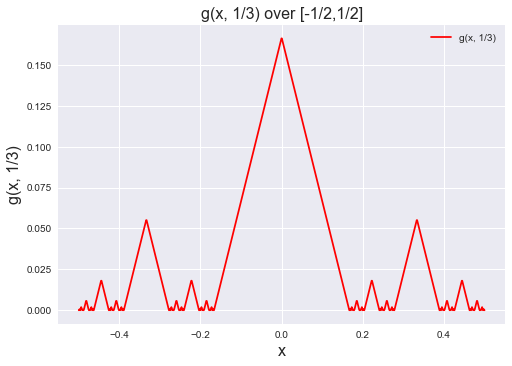

In [8]:
def f_seq(k, p, x): # the sequence of functions defined recursively
    if k==0:
        return abs(x)
    else:
        return abs(f_seq(k-1, p, x) - p**k)

def min_n(phi): # return the smallest n such that phi^n < 10^(-16)
    n = 0
    while phi**n >= 1e-16:
        n += 1
    return n

# Plug in phi=1/3 and plot over g over [-1/2, 1/2]
phi = 1/3
X_lin = np.linspace(-1/2, 1/2 ,1000)
Y_g = np.array([f_seq(min_n(phi), phi, XX) for XX in X_lin])
plt.plot(X_lin, Y_g, 'r-', label='g(x, 1/3)')
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x, 1/3)', fontsize=16)
plt.title('g(x, 1/3) over [-1/2,1/2]', fontsize=16)
plt.legend()

### (b)

In [9]:
# Use adaptive routine to integrate
T = 1e-6 
ws = [5/9, 8/9, 5/9]
xs = [-sqrt(3/5), 0, sqrt(3/5)] 
ms = [4, 5, 6, 7, 8] 

def g_phi_transform(x, phi, a, b): # the function g() to integrate given phi
    z = (b-a)/2 * x + (b+a)/2
    return f_seq(min_n(phi), phi, z)

def quad_3pts_g_phi(g, phi, w, x, a, b): # quadrature using the 3-point rule
    return (w[0]*g(x[0], phi, a, b) + w[1]*g(x[1], phi, a, b) + w[2]*g(x[2], phi, a, b))*(b-a)/2

def adaptive_integate_g_phi(g, phi, ws, xs, a, b, n_interval, total_err):
    c = (a+b)/2
    l = abs(a-b)
    I = quad_3pts_g_phi(g, phi, ws, xs, a, b)
    I2 = quad_3pts_g_phi(g, phi, ws, xs, a, c) + quad_3pts_g_phi(g, phi, ws, xs, c, b)
    E = abs(I - I2)
    if E < T*l:
        n_interval += 1
        return I, n_interval, E 
    else:
        IA, n1, E1 = adaptive_integate_g_phi(g, phi, ws, xs, a, c, n_interval, total_err)
        IB, n2, E2 = adaptive_integate_g_phi(g, phi, ws, xs, c, b, n_interval, total_err)
        total_err = E1 + E2
        return  IA+IB, (n1+n2), total_err


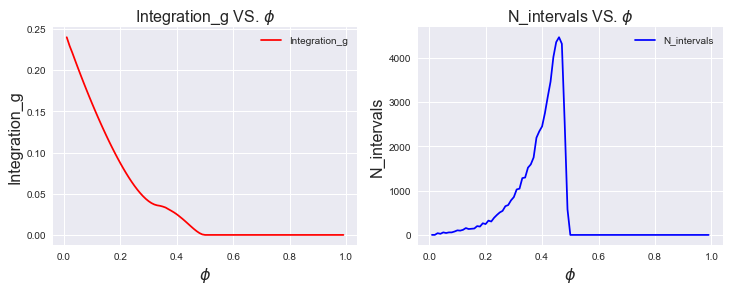

In [10]:
phi_lin = np.arange(0, 100)[1:]/100
I_g_list = []
n_g_list = []
for phi_v in phi_lin:
    I_g, n_g, e_g = adaptive_integate_g_phi(g_phi_transform, phi_v, ws, xs, -1/2, 1/2, 0, 0)
    I_g_list.append(I_g)
    n_g_list.append(n_g)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(phi_lin, I_g_list, 'r-', label='Integration_g')
axes[0].set_title('Integration_g VS. $\phi$',fontsize=16)
axes[0].set_xlabel('$\phi$',fontsize=16)
axes[0].set_ylabel('Integration_g',fontsize=16)
axes[0].legend()

axes[1].plot(phi_lin, n_g_list, 'b-', label='N_intervals')
axes[1].set_title('N_intervals VS. $\phi$',fontsize=16)
axes[1].set_xlabel('$\phi$', fontsize=16)
axes[1].set_ylabel('N_intervals', fontsize=16)
axes[1].legend()

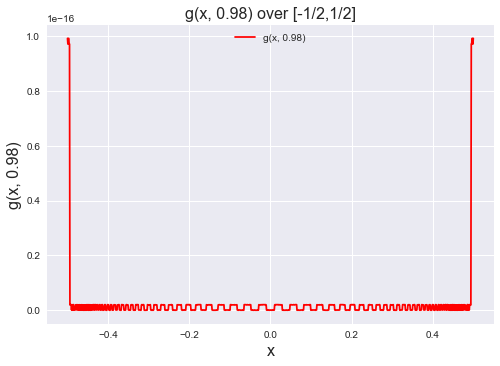

In [11]:
# Plot of g() given a phi close to 1
phi = 0.98
X_lin = np.linspace(-1/2, 1/2 ,1000)
Y_g = np.array([f_seq(min_n(phi), phi, XX) for XX in X_lin])

plt.plot(X_lin, Y_g, 'r-', label='g(x, 0.98)')
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x, 0.98)', fontsize=16)
plt.title('g(x, 0.98) over [-1/2,1/2]', fontsize=16)
plt.legend()

## Problem 6

### (b)

In [12]:
def find_real_roots(a, b, c): # find the root of a quadratic equation ax^2 + bx + c = 0 (assumig a!=0) 
    delta = b*b - 4*a*c
    if delta<0:
        return (False, -1, -1)
    x1 = (-b + sqrt(delta))/(2*a)
    x2 = (-b - sqrt(delta))/(2*a)
    return (True, x1, x2)

def is_segment_thru_circle(x0, y0, x1, y1, R): # determine if the line segment goes thru (0,0) centered r=R circle
    if x0 == x1:
        if abs(x0) > R:
            return False
        p1_y = sqrt(R*R-x0*x0)
        p2_y = -p1_y
        if (p1_y-y0)*(p1_y-y1) <= 0:
            return True
        if (p2_y-y0)*(p2_y-y1) <= 0:
            return True
        return False
    else:
        k = (y1-y0)/(x1-x0)
        a = k*k+1
        b = 2*k*(y0-k*x0)
        c = y0*y0 - 2*k*x0*y0 + k*k*x0*x0 - R*R
        has_root, r1_x, r2_x = find_real_roots(a, b, c)
        if has_root == False:
            return False
        if (r1_x-x0)*(r1_x-x1) <= 0:
            return True
        if (r2_x-x0)*(r2_x-x1) <= 0:
            return True
        return False

def is_segment_thru_earth(x0, y0, x1, y1): # determine if the line segment goes thru the earth
    return is_segment_thru_circle(x0, y0, x1, y1, 0.02)
    
def is_segment_thru_moon(x0, y0, x1, y1): # determine if the line segment goes thru the moon
    x0_s, x1_s = x0-1, x1-1
    return is_segment_thru_circle(x0_s, y0, x1_s, y1, 0.005)

### (c)

In [16]:
# Compute (u(0), v(0)) for 1 trial
x_obs = [1.0798, 1.0802]
y_obs = [0, -0.0189]
h = 0.02

noise_mean = 0
noise_std = 0.002

x1 = x_obs[1]+np.random.normal(noise_mean, noise_std, 1)
x0 = x_obs[0]+np.random.normal(noise_mean, noise_std, 1)

y1 = y_obs[1]+np.random.normal(noise_mean, noise_std, 1)
y0 = y_obs[0]+np.random.normal(noise_mean, noise_std, 1)

u0 = (x1-x0)/h
v0 = (y1-y0)/h

x0[0], y0[0], u0[0], v0[0]

(1.0809783821940631,
 -3.3104575012328564e-05,
 0.055998880056296052,
 -0.99620891124947275)

In [17]:
# Define Earth & Moon
r_earth = 0.02
r_moon = 0.005
cx_earth, cy_earth = 0, 0
cx_moon, cy_moon = 1, 0

theta_lin = np.linspace(0, 2*pi, 1500)
x_earth = np.array([r_earth*cos(tt) for tt in theta_lin])
y_earth = np.array([r_earth*sin(tt) for tt in theta_lin])
x_moon = np.array([r_moon*cos(tt)+1 for tt in theta_lin])
y_moon = np.array([r_moon*sin(tt) for tt in theta_lin])

In [18]:
def get_inits(n_trial): # return initial states for each trajectory simulation
    x0_list = []
    y0_list = []
    u0_list = []
    v0_list = []
    for i in range(n_trial):
        x1 = x_obs[1]+np.random.normal(noise_mean, noise_std, 1)
        x0 = x_obs[0]+np.random.normal(noise_mean, noise_std, 1)

        y1 = y_obs[1]+np.random.normal(noise_mean, noise_std, 1)
        y0 = y_obs[0]+np.random.normal(noise_mean, noise_std, 1)

        u0 = (x1-x0)/h
        v0 = (y1-y0)/h

        x0_list.append(x0[0])
        y0_list.append(y0[0])
        u0_list.append(u0[0])
        v0_list.append(v0[0])
    return (x0_list, y0_list, u0_list, v0_list)


def motion(state, t, mu): # the ODE to solve
    x, y, u, v = state
    d2_earth = x*x + y*y
    d2_moon = (x-1)*(x-1) + y*y
    u_prime = v + x - mu + ((x*(mu-1))/pow(d2_earth, 3/2)) - (((x-1)*mu)/pow(d2_moon, 3/2))
    y_prime = -u + y + ((y*(mu-1))/pow(d2_earth, 3/2)) - ((y*mu)/pow(d2_moon, 3/2))
    return [u, v, u_prime, y_prime]


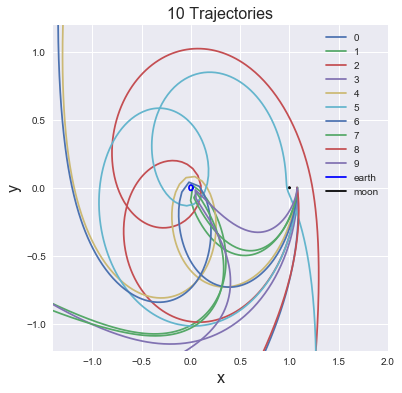

In [34]:
mu = 0.01
n_trial = 10 # number of simulations
n_steps = 501 # number of time steps
t = np.linspace(0, 10, n_steps) # time step size = 0.02
x_tj_list = []
y_tj_list = []

x0_list, y0_list, u0_list, v0_list = get_inits(n_trial)
for i in range(n_trial):
    state0 = [x0_list[i], y0_list[i], u0_list[i], v0_list[i]]
    numerical_sol = integrate.odeint(motion, state0, t, args=(mu,)) # solve the ODE
    x_tj_list.append(numerical_sol[:, 0])
    y_tj_list.append(numerical_sol[:, 1])

fig = plt.figure(figsize=(6, 6))
for i, (x, y) in enumerate(zip(x_tj_list, y_tj_list)):
    plt.plot(x, y, label=str(i))

# Plot the simulated trajectories with the Earth & the Moon
plt.plot(x_earth, y_earth, 'b-', label='earth')
plt.plot(x_moon, y_moon, 'k-', label='moon')
plt.xlim(-1.4, 2)
plt.ylim(-1.2, 1.2)
plt.title('10 Trajectories', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.legend()

### (d)

In [38]:
# Carry out larger size simulation
N_trial = 2500 
X0_list, Y0_list, U0_list, V0_list = get_inits(N_trial)

t = np.linspace(0, 10, n_steps)
X_tj_list = []
Y_tj_list = []
for X0, Y0, U0, V0 in zip(X0_list, Y0_list, U0_list, V0_list):
    state0 = [X0, Y0, U0, V0]
    numerical_sol = integrate.odeint(motion, state0, t, args=(mu,))
    X_tj_list.append(numerical_sol[:, 0])
    Y_tj_list.append(numerical_sol[:, 1])


In [39]:
# Calculate the total number of collisions with Earth / Moon / Both
n_thru_earth = 0
n_thru_moon = 0
n_thru_both = 0
idx_traj_thru_earth = []
idx_traj_thru_moon = []
idx_traj_thru_both = []

for idx, (x_tj, y_tj) in enumerate(zip(X_tj_list, Y_tj_list)):
    isthru_earth = False
    isthru_moon = False
    step_range = np.arange(n_steps)
    for step in step_range[:-1]:
        xi, yi, xj, yj = x_tj[step], y_tj[step], x_tj[step+1], y_tj[step+1]
        if isthru_earth == False:
            if is_segment_thru_earth(xi, yi, xj, yj):
                isthru_earth = True
        if isthru_moon == False:
            if is_segment_thru_moon(xi, yi, xj, yj):
                isthru_moon = True
    if isthru_earth:
        n_thru_earth += 1
        idx_traj_thru_earth.append(idx)
    if isthru_moon:
        n_thru_moon += 1
        idx_traj_thru_moon.append(idx)
    if isthru_earth and isthru_moon:
        n_thru_both += 1
        idx_traj_thru_both.append(idx)

print('The number of collision with \n- Earth: %d \n- Moon: %d \n- Both: %d'% (n_thru_earth, n_thru_moon, n_thru_both))
print('The probability of colliding with \n- Earth: %.7f \n- Moon: %.7f \n- Both: %.7f' % (n_thru_earth/N_trial, n_thru_moon/N_trial, n_thru_both/N_trial))

The number of collision with 
- Earth: 436 
- Moon: 8 
- Both: 2
The probability of colliding with 
- Earth: 0.1744000 
- Moon: 0.0032000 
- Both: 0.0008000


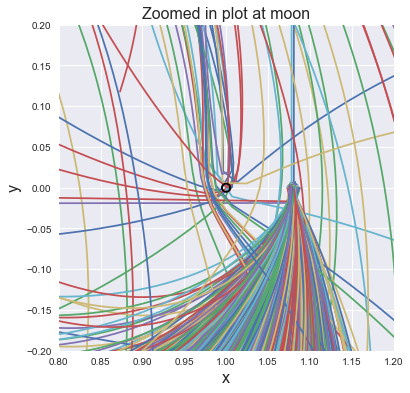

In [40]:
# Zoomed in plot at the Moon(1, 0)
fig = plt.figure(figsize=(6, 6))
for x, y in zip(X_tj_list, Y_tj_list):
    plt.plot(x, y)

plt.xlim(0.8, 1.2)
plt.ylim(-0.2, 0.2)
plt.plot(x_moon, y_moon, 'k-')
plt.title('Zoomed in plot at moon', fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)

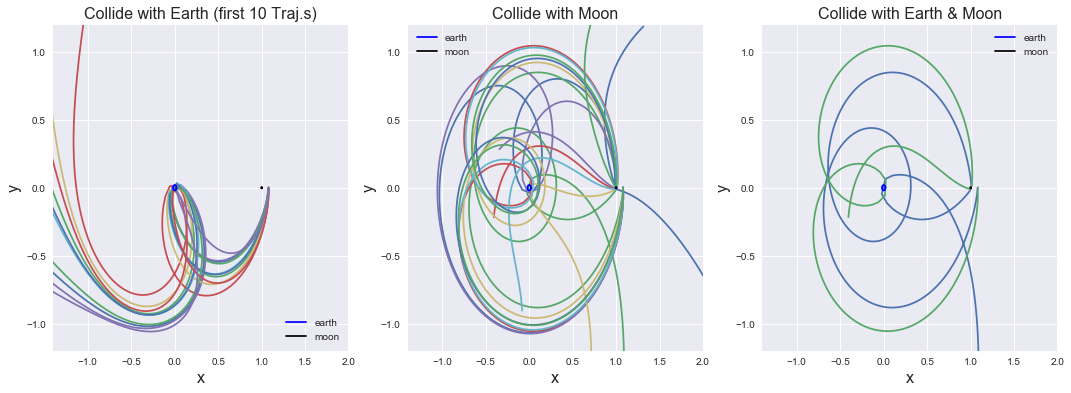

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i_earth in idx_traj_thru_earth[:10]:
    axes[0].plot(X_tj_list[i_earth], Y_tj_list[i_earth])
    
for i_moon in idx_traj_thru_moon:
    axes[1].plot(X_tj_list[i_moon], Y_tj_list[i_moon])
    
for i_both in idx_traj_thru_both:
    axes[2].plot(X_tj_list[i_both], Y_tj_list[i_both])

axes[0].set_title('Collide with Earth (first 10 Traj.s)',fontsize=16)
axes[1].set_title('Collide with Moon',fontsize=16)
axes[2].set_title('Collide with Earth & Moon',fontsize=16)
for ax in axes:
    ax.plot(x_earth, y_earth, 'b-', label='earth')
    ax.plot(x_moon, y_moon, 'k-', label='moon')
    ax.set_xlim(-1.4, 2)
    ax.set_ylim(-1.2, 1.2)
    ax.set_xlabel('x', fontsize=16)
    ax.set_ylabel('y', fontsize=16)
    ax.legend()
